In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/weather_data.csv')
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,pr,tasmax,tasmin,year,month
0,1901-01-01,33.17,15.80,1.34,1901,1
1,1901-02-01,13.82,17.25,3.25,1901,2
2,1901-03-01,23.80,24.56,10.42,1901,3
3,1901-04-01,14.41,29.53,14.90,1901,4
4,1901-05-01,31.31,34.52,19.57,1901,5


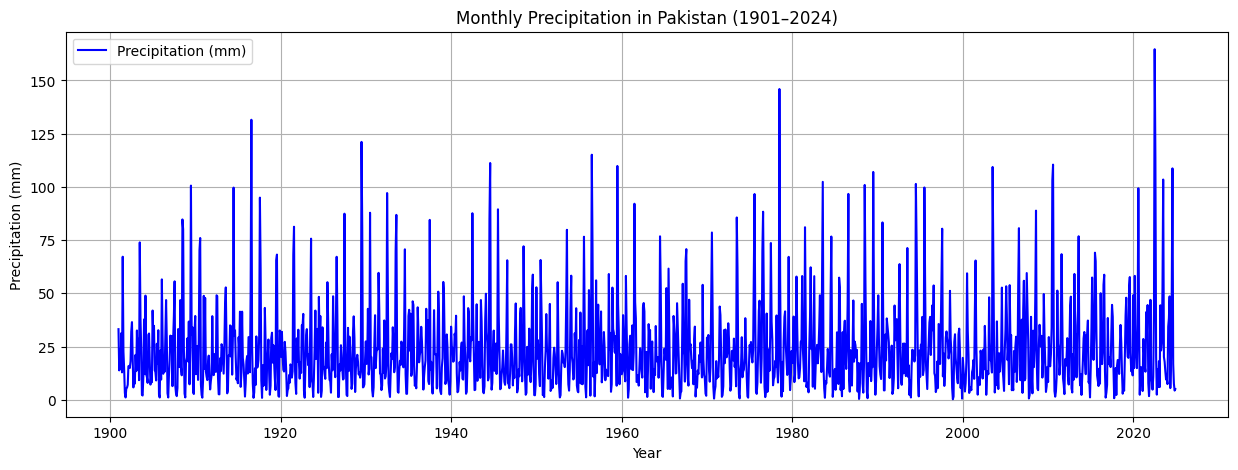

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(df["date"], df["pr"], label="Precipitation (mm)", color='blue')
plt.title("Monthly Precipitation in Pakistan (1901–2024)")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df["year"] = df["date"].dt.year
# Calculate annual averages directly from the available columns
annual_avg = df.groupby("year").agg(
    pr_annual_avg=('pr', 'mean'),
    tasmax_annual_avg=('tasmax', 'mean'),
    tasmin_annual_avg=('tasmin', 'mean')
).reset_index()

# Calculate mean temp as average of tasmax and tasmin
annual_avg['tas_avg'] = (annual_avg['tasmax_annual_avg'] + annual_avg['tasmin_annual_avg']) / 2

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
date      0
pr        0
tasmax    0
tasmin    0
year      0
month     0
dtype: int64


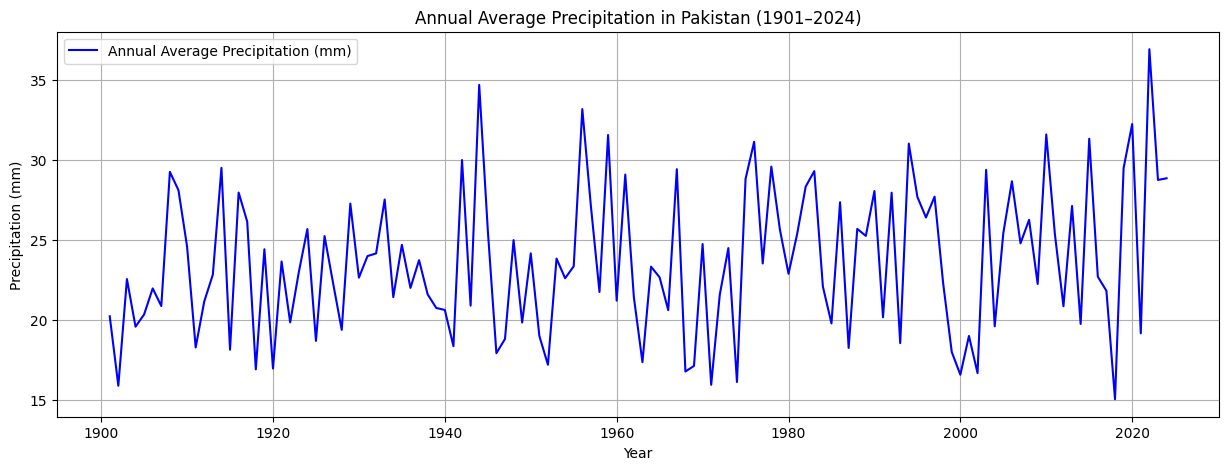

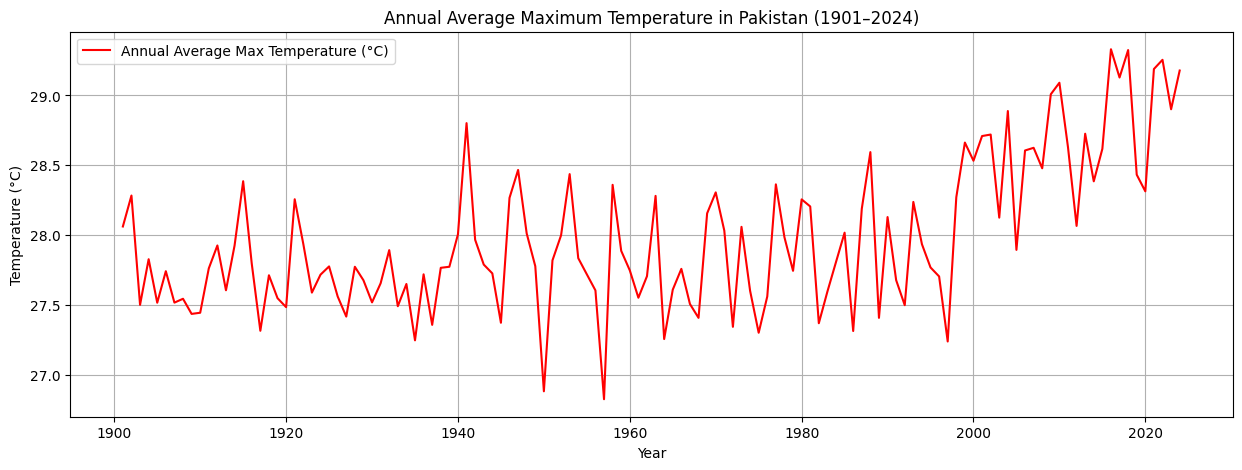

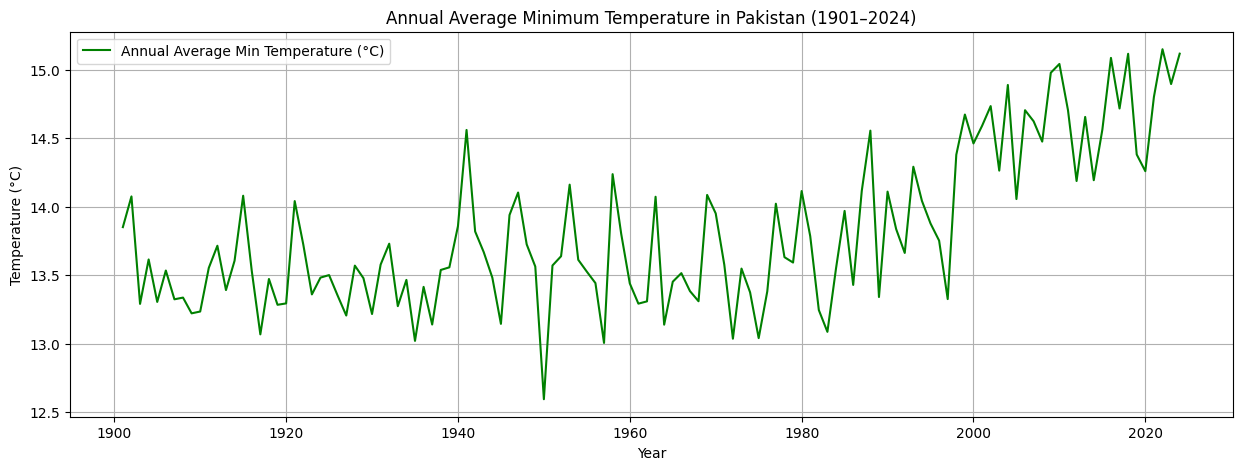

In [ ]:
import matplotlib.pyplot as plt

# Plot annual average precipitation
plt.figure(figsize=(15, 5))
pr_annual_avg = annual_avg[annual_avg["indicator"] == "pr"]
plt.plot(pr_annual_avg["year"], pr_annual_avg["value"], label="Annual Average Precipitation (mm)", color='blue')
plt.title("Annual Average Precipitation in Pakistan (1901–2024)")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.legend()
plt.show()

# Plot annual average maximum temperature
plt.figure(figsize=(15, 5))
tasmax_annual_avg = annual_avg[annual_avg["indicator"] == "tasmax"]
plt.plot(tasmax_annual_avg["year"], tasmax_annual_avg["value"], label="Annual Average Max Temperature (°C)", color='red')
plt.title("Annual Average Maximum Temperature in Pakistan (1901–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# Plot annual average minimum temperature
plt.figure(figsize=(15, 5))
tasmin_annual_avg = annual_avg[annual_avg["indicator"] == "tasmin"]
plt.plot(tasmin_annual_avg["year"], tasmin_annual_avg["value"], label="Annual Average Min Temperature (°C)", color='green')
plt.title("Annual Average Minimum Temperature in Pakistan (1901–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df["month"] = df["date"].dt.month
monthly_avg = df.groupby(["indicator", "month"])["value"].mean().reset_index()

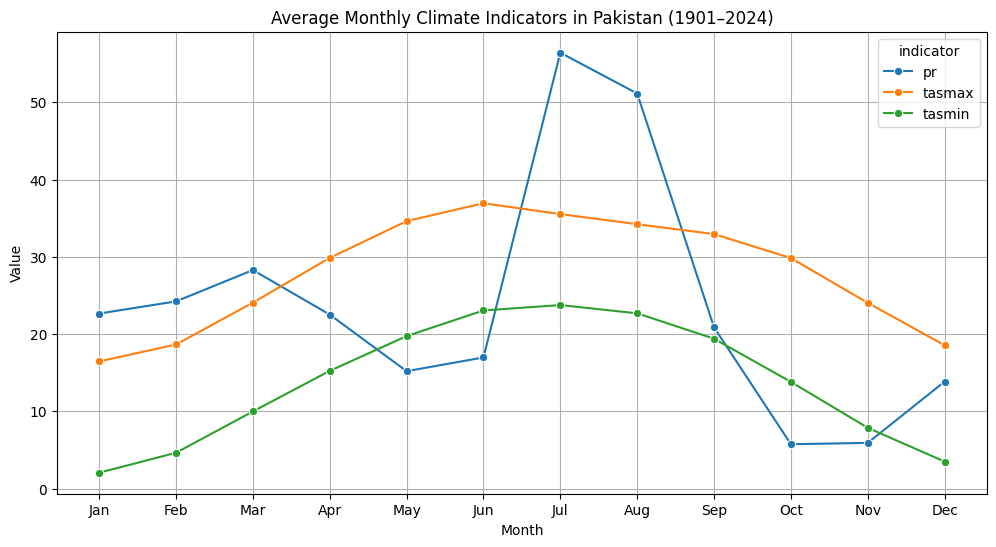

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x='month', y='value', hue='indicator', marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Monthly Climate Indicators in Pakistan (1901–2024)")
plt.ylabel("Value")
plt.xlabel("Month")
plt.grid(True)
plt.show()

In [ ]:
# Step 6: Save the pivoted DataFrame to Google Drive as CSV
pivoted_output_path = "/content/drive/MyDrive/pakistan_weather_pivoted_1901_2024.csv"
pivoted.to_csv(pivoted_output_path)

print(f"✅ Pivoted file saved to: {pivoted_output_path}")

✅ Pivoted file saved to: /content/drive/MyDrive/pakistan_weather_pivoted_1901_2024.csv


# Task
Calculate z-scores for the anomalies in the weather data, identify anomalies based on a z-score threshold, and label these anomalies on the existing plots. Use the data from "weather_data.csv".

## Calculate z-scores

### Subtask:
Calculate the standard deviation of the anomalies for each month and indicator, and then compute the Z-score for each monthly anomaly.


**Reasoning**:
Calculate the standard deviation of the anomalies for each month and indicator, merge it back to the anomaly DataFrame, and then calculate the Z-scores.



In [ ]:
# Calculate the standard deviation of the anomalies for each month and indicator
anomaly_std = df_anomalies.groupby('month').agg(
    pr_anomaly_std=('pr_anomaly', 'std'),
    tasmax_anomaly_std=('tasmax_anomaly', 'std'),
    tasmin_anomaly_std=('tasmin_anomaly', 'std')
).reset_index()

# Merge the anomaly_std DataFrame back into the df_anomalies DataFrame based on the 'month' column
df_anomalies = pd.merge(df_anomalies, anomaly_std, on='month', how='left')

# Calculate the Z-score for each anomaly
df_anomalies['pr_anomaly_zscore'] = df_anomalies['pr_anomaly'] / df_anomalies['pr_anomaly_std']
df_anomalies['tasmax_anomaly_zscore'] = df_anomalies['tasmax_anomaly'] / df_anomalies['tasmax_anomaly_std']
df_anomalies['tasmin_anomaly_zscore'] = df_anomalies['tasmin_anomaly'] / df_anomalies['tasmin_anomaly_std']

# Display the first few rows with anomalies and z-scores
print("DataFrame with Seasonal Anomalies and Z-scores:")
display(df_anomalies.head())

# Display the last few rows to see recent anomalies and z-scores
print("\nRecent Seasonal Anomalies and Z-scores:")
display(df_anomalies.tail())

DataFrame with Seasonal Anomalies and Z-scores:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,tasmax_anomaly,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore
0,1901-01-01,33.17,15.80,1.34,1901,1,22.657258,16.462097,2.060323,10.512742,-0.662097,-0.720323,12.310182,0.985174,0.982412,0.853988,-0.672061,-0.733218
1,1901-02-01,13.82,17.25,3.25,1901,2,24.231694,18.653629,4.643871,-10.411694,-1.403629,-1.393871,12.992414,1.437185,1.391407,-0.801367,-0.976652,-1.001771
2,1901-03-01,23.80,24.56,10.42,1901,3,28.283952,24.069839,9.989355,-4.483952,0.490161,0.430645,12.808955,1.417680,1.355024,-0.350064,0.345749,0.317814
3,1901-04-01,14.41,29.53,14.90,1901,4,22.520323,29.859355,15.241371,-8.110323,-0.329355,-0.341371,9.807546,1.375858,1.331322,-0.826947,-0.239381,-0.256415
4,1901-05-01,31.31,34.52,19.57,1901,5,15.198871,34.617984,19.738952,16.111129,-0.097984,-0.168952,6.804122,1.160285,1.113540,2.367848,-0.084448,-0.151725



Recent Seasonal Anomalies and Z-scores:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,tasmax_anomaly,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore
1483,2024-08-01,108.68,34.16,23.07,2024,8,51.130484,34.219919,22.684032,57.549516,-0.059919,0.385968,25.454459,0.500167,0.509894,2.260882,-0.119799,0.756957
1484,2024-09-01,16.97,34.63,21.03,2024,9,20.870806,32.938306,19.400000,-3.900806,1.691694,1.630000,11.366919,0.673465,0.691967,-0.343172,2.511923,2.355605
1485,2024-10-01,7.55,32.26,16.90,2024,10,5.744435,29.837177,13.813952,1.805565,2.422823,3.086048,4.052615,0.881721,0.982898,0.445531,2.747834,3.139743
1486,2024-11-01,4.33,26.91,10.99,2024,11,5.922823,24.043306,7.872258,-1.592823,2.866694,3.117742,5.095617,0.888573,1.042806,-0.312587,3.226176,2.989761
1487,2024-12-01,5.05,18.43,3.19,2024,12,13.850645,18.545081,3.498145,-8.800645,-0.115081,-0.308145,9.700423,0.930859,0.985155,-0.907243,-0.123628,-0.312788


## Identify anomalies

### Subtask:
Define a threshold for the Z-score to identify statistically significant anomalies.


**Reasoning**:
Define a z-score threshold and identify significant anomalies based on this threshold.



In [ ]:
# Define a threshold for the Z-score
zscore_threshold = 2

# Create boolean columns for significant anomalies
df_anomalies['pr_anomaly_significant'] = abs(df_anomalies['pr_anomaly_zscore']) >= zscore_threshold
df_anomalies['tasmax_anomaly_significant'] = abs(df_anomalies['tasmax_anomaly_zscore']) >= zscore_threshold
df_anomalies['tasmin_anomaly_significant'] = abs(df_anomalies['tasmin_anomaly_zscore']) >= zscore_threshold

# Print the count of significant anomalies for each indicator
print("\nNumber of Significant Anomalies (Z-score >= {}):".format(zscore_threshold))
print("Precipitation:", df_anomalies['pr_anomaly_significant'].sum())
print("Maximum Temperature:", df_anomalies['tasmax_anomaly_significant'].sum())
print("Minimum Temperature:", df_anomalies['tasmin_anomaly_significant'].sum())

# Display the first few rows with significant anomaly flags
print("\nDataFrame with Significant Anomaly Flags:")
display(df_anomalies.head())


Number of Significant Anomalies (Z-score >= 2):
Precipitation: 63
Maximum Temperature: 73
Minimum Temperature: 67

DataFrame with Significant Anomaly Flags:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,...,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore,pr_anomaly_significant,tasmax_anomaly_significant,tasmin_anomaly_significant
0,1901-01-01,33.17,15.80,1.34,1901,1,22.657258,16.462097,2.060323,10.512742,...,-0.720323,12.310182,0.985174,0.982412,0.853988,-0.672061,-0.733218,False,False,False
1,1901-02-01,13.82,17.25,3.25,1901,2,24.231694,18.653629,4.643871,-10.411694,...,-1.393871,12.992414,1.437185,1.391407,-0.801367,-0.976652,-1.001771,False,False,False
2,1901-03-01,23.80,24.56,10.42,1901,3,28.283952,24.069839,9.989355,-4.483952,...,0.430645,12.808955,1.417680,1.355024,-0.350064,0.345749,0.317814,False,False,False
3,1901-04-01,14.41,29.53,14.90,1901,4,22.520323,29.859355,15.241371,-8.110323,...,-0.341371,9.807546,1.375858,1.331322,-0.826947,-0.239381,-0.256415,False,False,False
4,1901-05-01,31.31,34.52,19.57,1901,5,15.198871,34.617984,19.738952,16.111129,...,-0.168952,6.804122,1.160285,1.113540,2.367848,-0.084448,-0.151725,True,False,False


## Label anomalies on plots

### Subtask:
Modify the plotting code to highlight or label the data points that correspond to the identified significant anomalies.


**Reasoning**:
Filter the DataFrame for significant anomalies and add scatter plots to the existing anomaly plots to highlight these points.



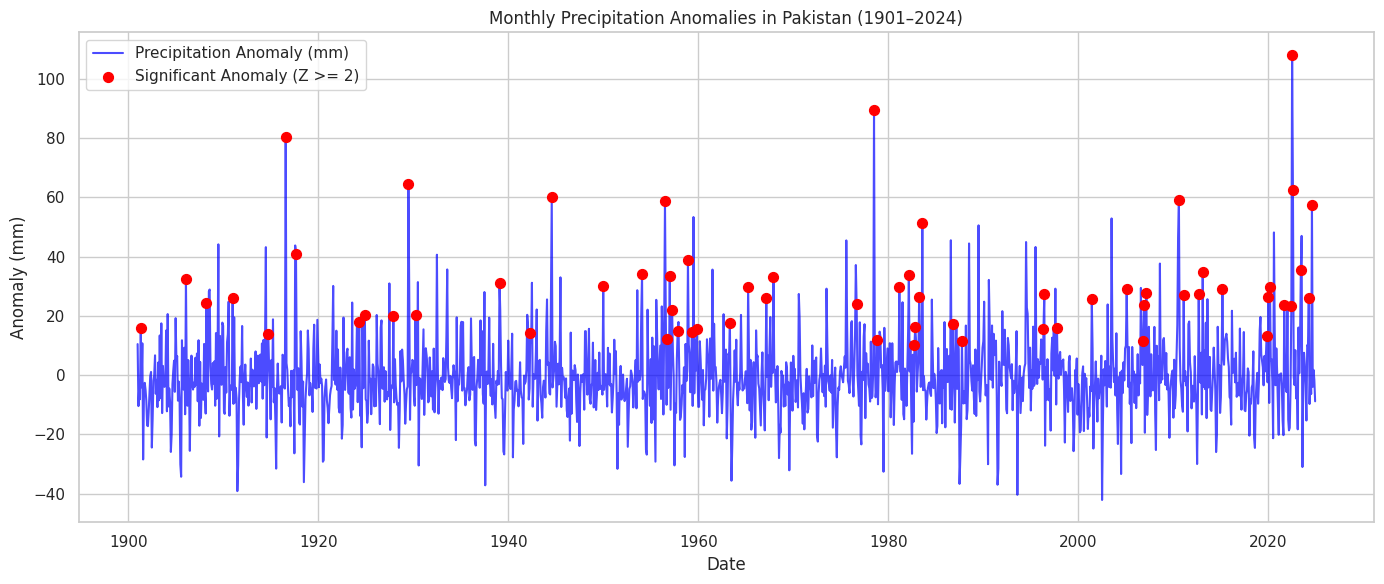

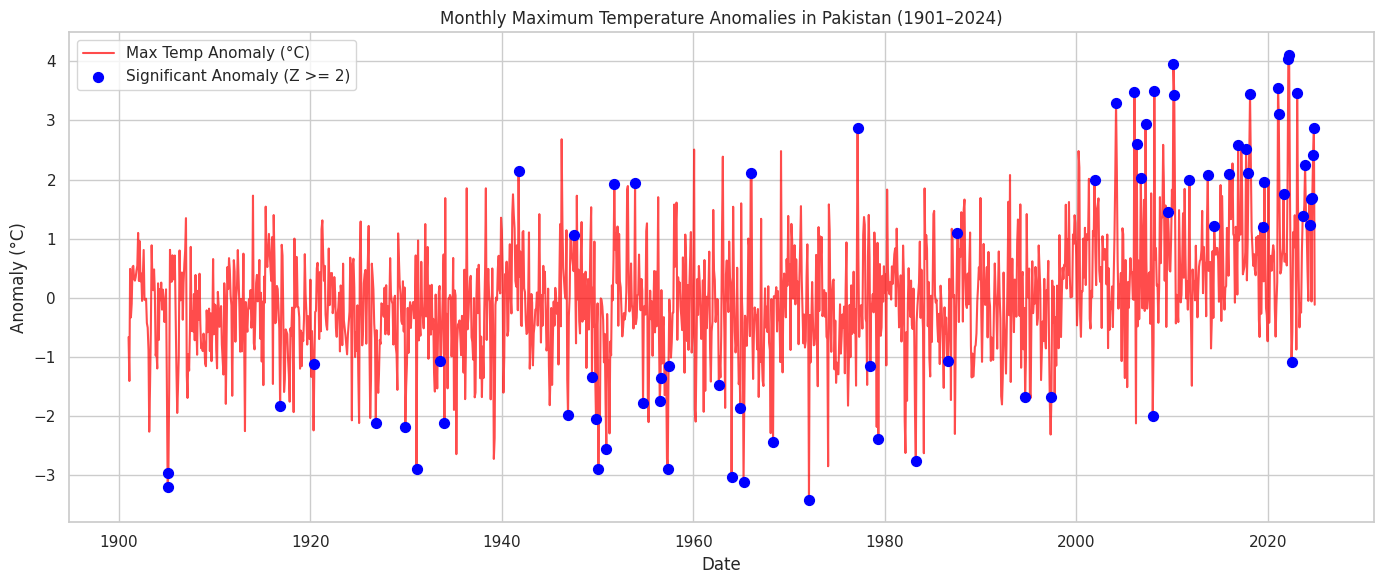

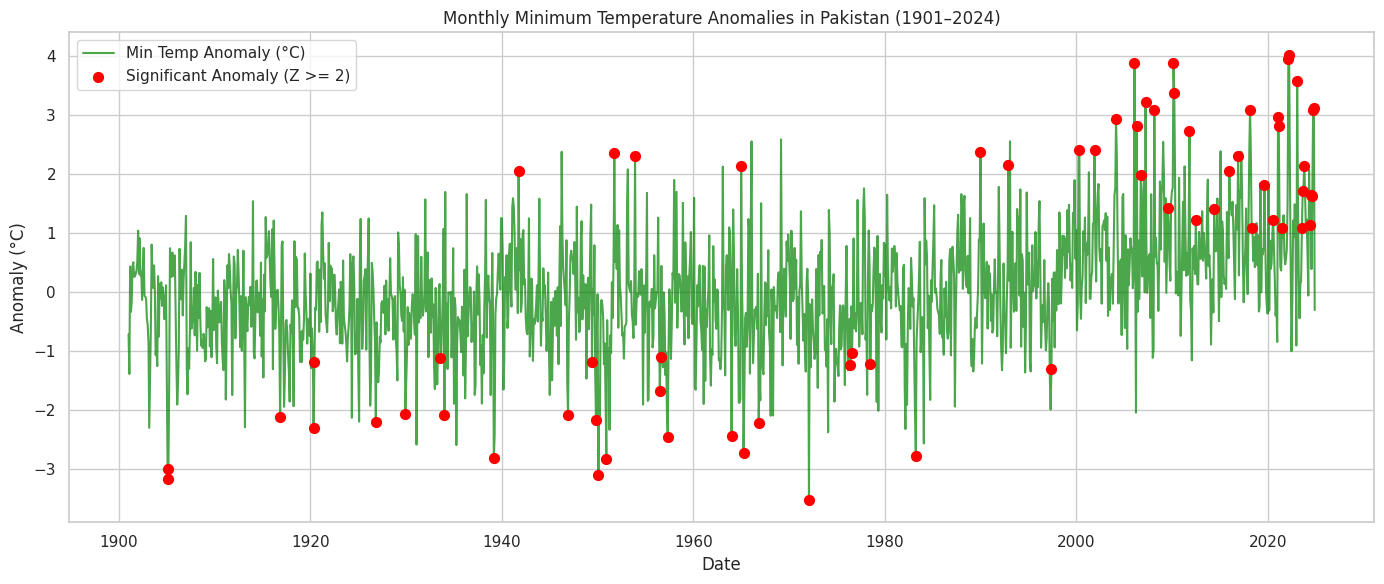

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid', rc={'figure.figsize': (14, 8)})

# Filter for significant anomalies
pr_anomalies_significant = df_anomalies[df_anomalies['pr_anomaly_significant']].copy()
tasmax_anomalies_significant = df_anomalies[df_anomalies['tasmax_anomaly_significant']].copy()
tasmin_anomalies_significant = df_anomalies[df_anomalies['tasmin_anomaly_significant']].copy()


# --- Precipitation Anomaly Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_anomalies['date'], df_anomalies['pr_anomaly'], label='Precipitation Anomaly (mm)', color='blue', alpha=0.7)
plt.scatter(pr_anomalies_significant['date'], pr_anomalies_significant['pr_anomaly'],
            color='red', s=50, label='Significant Anomaly (Z >= {})'.format(zscore_threshold), zorder=5)
plt.title('Monthly Precipitation Anomalies in Pakistan (1901–2024)')
plt.xlabel('Date')
plt.ylabel('Anomaly (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Maximum Temperature Anomaly Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_anomalies['date'], df_anomalies['tasmax_anomaly'], label='Max Temp Anomaly (°C)', color='red', alpha=0.7)
plt.scatter(tasmax_anomalies_significant['date'], tasmax_anomalies_significant['tasmax_anomaly'],
            color='blue', s=50, label='Significant Anomaly (Z >= {})'.format(zscore_threshold), zorder=5)
plt.title('Monthly Maximum Temperature Anomalies in Pakistan (1901–2024)')
plt.xlabel('Date')
plt.ylabel('Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Minimum Temperature Anomaly Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_anomalies['date'], df_anomalies['tasmin_anomaly'], label='Min Temp Anomaly (°C)', color='green', alpha=0.7)
plt.scatter(tasmin_anomalies_significant['date'], tasmin_anomalies_significant['tasmin_anomaly'],
            color='red', s=50, label='Significant Anomaly (Z >= {})'.format(zscore_threshold), zorder=5)
plt.title('Monthly Minimum Temperature Anomalies in Pakistan (1901–2024)')
plt.xlabel('Date')
plt.ylabel('Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Refine visualization

### Subtask:
Refine plot aesthetics (e.g., marker styles, colors, annotations) for clarity.


**Reasoning**:
Adjust marker size and transparency, consider adding annotations to extreme points, review color choices, and ensure clarity of labels and legends for the significant anomaly plots.



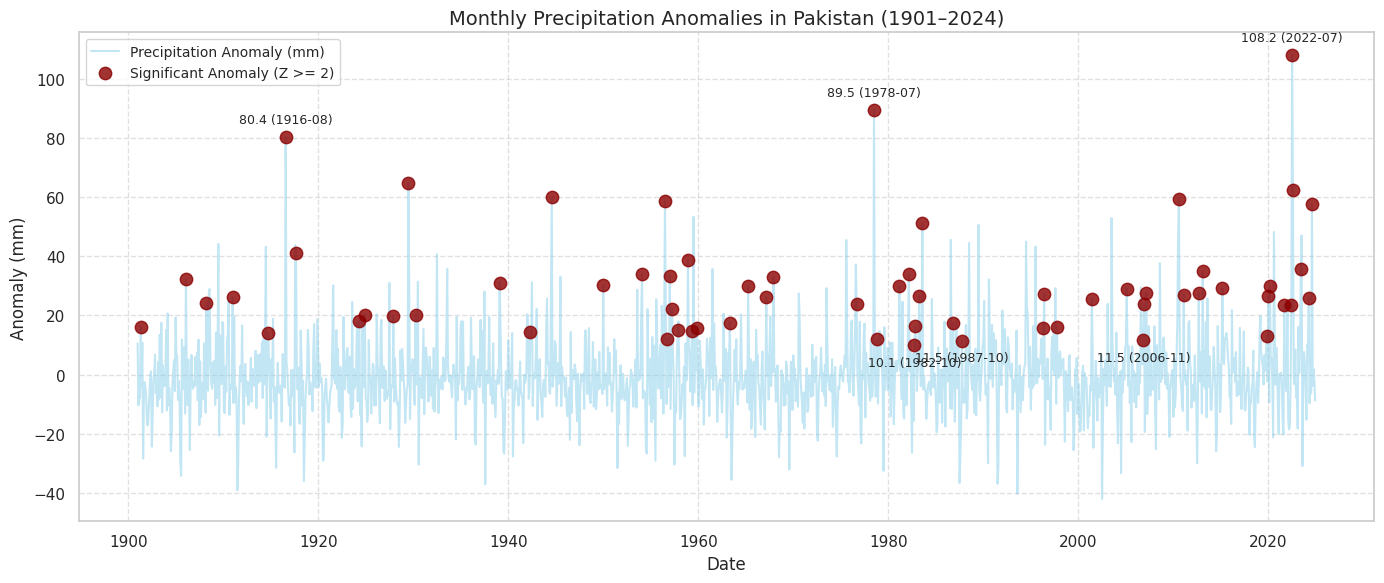

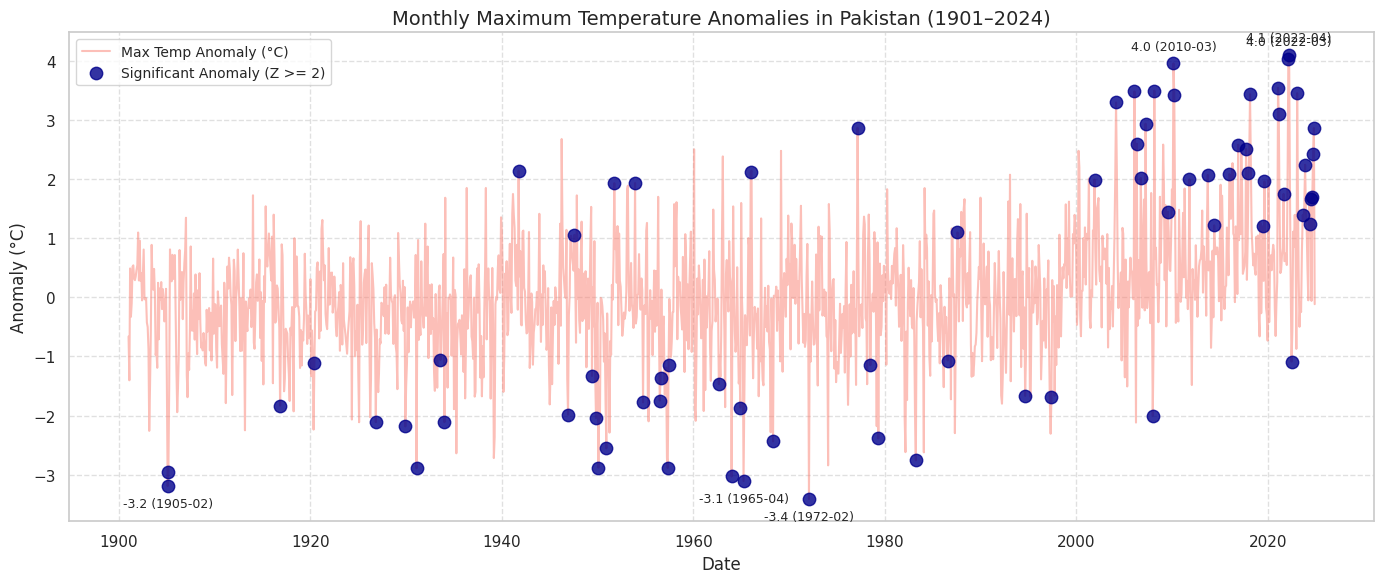

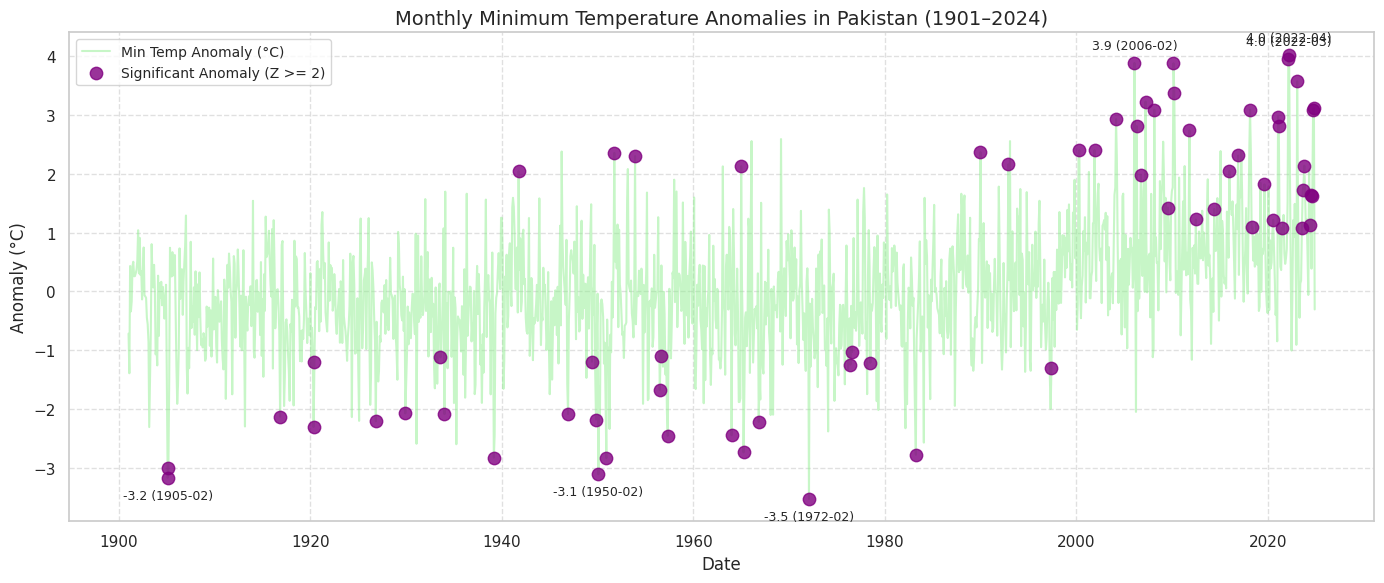

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid', rc={'figure.figsize': (14, 8)})

# Filter for significant anomalies (already done in previous step, using existing dataframes)
# pr_anomalies_significant = df_anomalies[df_anomalies['pr_anomaly_significant']].copy()
# tasmax_anomalies_significant = df_anomalies[df_anomalies['tasmax_anomaly_significant']].copy()
# tasmin_anomalies_significant = df_anomalies[df_anomalies['tasmin_anomaly_significant']].copy()


# --- Precipitation Anomaly Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_anomalies['date'], df_anomalies['pr_anomaly'], label='Precipitation Anomaly (mm)', color='skyblue', alpha=0.5) # Adjusted color and alpha
plt.scatter(pr_anomalies_significant['date'], pr_anomalies_significant['pr_anomaly'],
            color='darkred', s=80, alpha=0.8, label='Significant Anomaly (Z >= {})'.format(zscore_threshold), zorder=5) # Adjusted size, color, alpha

# Add annotations for most extreme precipitation anomalies
# Find top 3 positive and top 3 negative anomalies
top_pr_anomalies = pr_anomalies_significant.nlargest(3, 'pr_anomaly')
bottom_pr_anomalies = pr_anomalies_significant.nsmallest(3, 'pr_anomaly')

for index, row in top_pr_anomalies.iterrows():
    plt.annotate(f"{row['pr_anomaly']:.1f} ({row['date'].strftime('%Y-%m')})",
                 (row['date'], row['pr_anomaly']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

for index, row in bottom_pr_anomalies.iterrows():
     plt.annotate(f"{row['pr_anomaly']:.1f} ({row['date'].strftime('%Y-%m')})",
                 (row['date'], row['pr_anomaly']), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)


plt.title('Monthly Precipitation Anomalies in Pakistan (1901–2024)', fontsize=14) # Adjusted title font size
plt.xlabel('Date', fontsize=12) # Adjusted label font size
plt.ylabel('Anomaly (mm)', fontsize=12) # Adjusted label font size
plt.grid(True, linestyle='--', alpha=0.6) # Adjusted grid style and alpha
plt.legend(fontsize=10) # Adjusted legend font size
plt.tight_layout()
plt.show()

# --- Maximum Temperature Anomaly Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_anomalies['date'], df_anomalies['tasmax_anomaly'], label='Max Temp Anomaly (°C)', color='salmon', alpha=0.5) # Adjusted color and alpha
plt.scatter(tasmax_anomalies_significant['date'], tasmax_anomalies_significant['tasmax_anomaly'],
            color='darkblue', s=80, alpha=0.8, label='Significant Anomaly (Z >= {})'.format(zscore_threshold), zorder=5) # Adjusted size, color, alpha

# Add annotations for most extreme tasmax anomalies
top_tasmax_anomalies = tasmax_anomalies_significant.nlargest(3, 'tasmax_anomaly')
bottom_tasmax_anomalies = tasmax_anomalies_significant.nsmallest(3, 'tasmax_anomaly')

for index, row in top_tasmax_anomalies.iterrows():
    plt.annotate(f"{row['tasmax_anomaly']:.1f} ({row['date'].strftime('%Y-%m')})",
                 (row['date'], row['tasmax_anomaly']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

for index, row in bottom_tasmax_anomalies.iterrows():
     plt.annotate(f"{row['tasmax_anomaly']:.1f} ({row['date'].strftime('%Y-%m')})",
                 (row['date'], row['tasmax_anomaly']), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)

plt.title('Monthly Maximum Temperature Anomalies in Pakistan (1901–2024)', fontsize=14) # Adjusted title font size
plt.xlabel('Date', fontsize=12) # Adjusted label font size
plt.ylabel('Anomaly (°C)', fontsize=12) # Adjusted label font size
plt.grid(True, linestyle='--', alpha=0.6) # Adjusted grid style and alpha
plt.legend(fontsize=10) # Adjusted legend font size
plt.tight_layout()
plt.show()

# --- Minimum Temperature Anomaly Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_anomalies['date'], df_anomalies['tasmin_anomaly'], label='Min Temp Anomaly (°C)', color='lightgreen', alpha=0.5) # Adjusted color and alpha
plt.scatter(tasmin_anomalies_significant['date'], tasmin_anomalies_significant['tasmin_anomaly'],
            color='purple', s=80, alpha=0.8, label='Significant Anomaly (Z >= {})'.format(zscore_threshold), zorder=5) # Adjusted size, color, alpha

# Add annotations for most extreme tasmin anomalies
top_tasmin_anomalies = tasmin_anomalies_significant.nlargest(3, 'tasmin_anomaly')
bottom_tasmin_anomalies = tasmin_anomalies_significant.nsmallest(3, 'tasmin_anomaly')

for index, row in top_tasmin_anomalies.iterrows():
    plt.annotate(f"{row['tasmin_anomaly']:.1f} ({row['date'].strftime('%Y-%m')})",
                 (row['date'], row['tasmin_anomaly']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

for index, row in bottom_tasmin_anomalies.iterrows():
     plt.annotate(f"{row['tasmin_anomaly']:.1f} ({row['date'].strftime('%Y-%m')})",
                 (row['date'], row['tasmin_anomaly']), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)

plt.title('Monthly Minimum Temperature Anomalies in Pakistan (1901–2024)', fontsize=14) # Adjusted title font size
plt.xlabel('Date', fontsize=12) # Adjusted label font size
plt.ylabel('Anomaly (°C)', fontsize=12) # Adjusted label font size
plt.grid(True, linestyle='--', alpha=0.6) # Adjusted grid style and alpha
plt.legend(fontsize=10) # Adjusted legend font size
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A Z-score threshold of 2 was used to identify statistically significant anomalies.
*   Based on this threshold, there were 63 significant precipitation anomalies, 73 significant maximum temperature anomalies, and 67 significant minimum temperature anomalies.
*   The plots successfully highlighted the significant anomalies with distinct markers and colors, and annotations were added to the top 3 highest and lowest significant anomalies for each weather indicator, showing the anomaly value and date.

### Insights or Next Steps

*   Investigate the specific events or climate patterns corresponding to the most extreme significant anomalies identified in the plots to understand their potential causes and impacts.
*   Consider exploring different Z-score thresholds or other anomaly detection methods to compare the results and assess the sensitivity of the findings to the chosen threshold.


In [ ]:
print("Top 3 Positive Significant Precipitation Anomalies:")
display(top_pr_anomalies)

print("\nTop 3 Negative Significant Precipitation Anomalies:")
display(bottom_pr_anomalies)

print("\nTop 3 Positive Significant Maximum Temperature Anomalies:")
display(top_tasmax_anomalies)

print("\nTop 3 Negative Significant Maximum Temperature Anomalies:")
display(bottom_tasmax_anomalies)

print("\nTop 3 Positive Significant Minimum Temperature Anomalies:")
display(top_tasmin_anomalies)

print("\nTop 3 Negative Significant Minimum Temperature Anomalies:")
display(bottom_tasmin_anomalies)

Top 3 Positive Significant Precipitation Anomalies:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,...,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore,pr_anomaly_significant,tasmax_anomaly_significant,tasmin_anomaly_significant
1458,2022-07-01,164.64,34.44,22.75,2022,7,56.408306,35.527823,23.757177,108.231694,...,-1.007177,28.076099,0.527702,0.513384,3.854941,-2.061434,-1.961839,True,True,False
930,1978-07-01,145.95,34.38,22.54,1978,7,56.408306,35.527823,23.757177,89.541694,...,-1.217177,28.076099,0.527702,0.513384,3.189250,-2.175135,-2.370889,True,True,True
187,1916-08-01,131.51,34.37,22.72,1916,8,51.130484,34.219919,22.684032,80.379516,...,0.035968,25.454459,0.500167,0.509894,3.157777,0.300061,0.070540,True,False,False



Top 3 Negative Significant Precipitation Anomalies:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,...,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore,pr_anomaly_significant,tasmax_anomaly_significant,tasmin_anomaly_significant
981,1982-10-01,15.80,30.13,14.39,1982,10,5.744435,29.837177,13.813952,10.055565,...,0.576048,4.052615,0.881721,0.982898,2.481254,0.332103,0.586071,True,False,False
1041,1987-10-01,17.25,29.43,14.14,1987,10,5.744435,29.837177,13.813952,11.505565,...,0.326048,4.052615,0.881721,0.982898,2.839047,-0.461799,0.331721,True,False,False
1270,2006-11-01,17.46,25.06,9.58,2006,11,5.922823,24.043306,7.872258,11.537177,...,1.707742,5.095617,0.888573,1.042806,2.264137,1.144187,1.637640,True,False,False



Top 3 Positive Significant Maximum Temperature Anomalies:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,...,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore,pr_anomaly_significant,tasmax_anomaly_significant,tasmin_anomaly_significant
1455,2022-04-01,4.77,33.97,19.27,2022,4,22.520323,29.859355,15.241371,-17.750323,...,4.028629,9.807546,1.375858,1.331322,-1.809864,2.987696,3.026036,False,True,True
1454,2022-03-01,9.67,28.10,13.94,2022,3,28.283952,24.069839,9.989355,-18.613952,...,3.950645,12.808955,1.417680,1.355024,-1.453198,2.842785,2.915554,False,True,True
1310,2010-03-01,17.13,28.03,13.87,2010,3,28.283952,24.069839,9.989355,-11.153952,...,3.880645,12.808955,1.417680,1.355024,-0.870793,2.793409,2.863895,False,True,True



Top 3 Negative Significant Maximum Temperature Anomalies:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,...,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore,pr_anomaly_significant,tasmax_anomaly_significant,tasmin_anomaly_significant
853,1972-02-01,17.18,15.24,1.11,1972,2,24.231694,18.653629,4.643871,-7.051694,...,-3.533871,12.992414,1.437185,1.391407,-0.542755,-2.375220,-2.539783,False,True,True
49,1905-02-01,29.04,15.46,1.47,1905,2,24.231694,18.653629,4.643871,4.808306,...,-3.173871,12.992414,1.437185,1.391407,0.370086,-2.222142,-2.281052,False,True,True
771,1965-04-01,52.45,26.75,12.50,1965,4,22.520323,29.859355,15.241371,29.929677,...,-2.741371,9.807546,1.375858,1.331322,3.051699,-2.259939,-2.059134,True,True,True



Top 3 Positive Significant Minimum Temperature Anomalies:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,...,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore,pr_anomaly_significant,tasmax_anomaly_significant,tasmin_anomaly_significant
1455,2022-04-01,4.77,33.97,19.27,2022,4,22.520323,29.859355,15.241371,-17.750323,...,4.028629,9.807546,1.375858,1.331322,-1.809864,2.987696,3.026036,False,True,True
1454,2022-03-01,9.67,28.10,13.94,2022,3,28.283952,24.069839,9.989355,-18.613952,...,3.950645,12.808955,1.417680,1.355024,-1.453198,2.842785,2.915554,False,True,True
1261,2006-02-01,13.13,22.14,8.53,2006,2,24.231694,18.653629,4.643871,-11.101694,...,3.886129,12.992414,1.437185,1.391407,-0.854475,2.425834,2.792950,False,True,True



Top 3 Negative Significant Minimum Temperature Anomalies:


,date,pr,tasmax,tasmin,year,month,pr_monthly_avg_historical,tasmax_monthly_avg_historical,tasmin_monthly_avg_historical,pr_anomaly,...,tasmin_anomaly,pr_anomaly_std,tasmax_anomaly_std,tasmin_anomaly_std,pr_anomaly_zscore,tasmax_anomaly_zscore,tasmin_anomaly_zscore,pr_anomaly_significant,tasmax_anomaly_significant,tasmin_anomaly_significant
853,1972-02-01,17.18,15.24,1.11,1972,2,24.231694,18.653629,4.643871,-7.051694,...,-3.533871,12.992414,1.437185,1.391407,-0.542755,-2.375220,-2.539783,False,True,True
49,1905-02-01,29.04,15.46,1.47,1905,2,24.231694,18.653629,4.643871,4.808306,...,-3.173871,12.992414,1.437185,1.391407,0.370086,-2.222142,-2.281052,False,True,True
589,1950-02-01,19.30,15.77,1.53,1950,2,24.231694,18.653629,4.643871,-4.931694,...,-3.113871,12.992414,1.437185,1.391407,-0.379583,-2.006443,-2.237930,False,True,True


In [ ]:
# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a 'season' column
df['season'] = df['month'].apply(get_season)

# Calculate mean temperatures by year and season
seasonal_mean_temp = df.groupby(['year', 'season'])[['tasmax', 'tasmin']].mean().reset_index()

# Calculate the overall mean temperature for each season
seasonal_mean_temp['tas_avg'] = (seasonal_mean_temp['tasmax'] + seasonal_mean_temp['tasmin']) / 2

# Display the seasonal mean temperatures
print("Seasonal Mean Temperatures:")
display(seasonal_mean_temp.head())

Seasonal Mean Temperatures:


,year,season,tasmax,tasmin,tas_avg
0,1901,Autumn,29.310000,14.006667,21.658333
1,1901,Spring,29.536667,14.963333,22.250000
2,1901,Summer,36.020000,23.563333,29.791667
3,1901,Winter,17.380000,2.870000,10.125000
4,1902,Autumn,28.913333,13.606667,21.260000


In [ ]:
# Calculate the historical average temperature for each season across all years
historical_seasonal_avg_temp = seasonal_mean_temp.groupby('season')['tas_avg'].mean().reset_index()

# Rename the column for clarity
historical_seasonal_avg_temp.rename(columns={'tas_avg': 'historical_avg_temp'}, inplace=True)

# Display the historical average seasonal temperatures
print("Historical Average Seasonal Temperatures:")
display(historical_seasonal_avg_temp)

Historical Average Seasonal Temperatures:


,season,historical_avg_temp
0,Autumn,21.317500
1,Spring,22.252809
2,Summer,29.362944
3,Winter,10.643858


In [ ]:
from scipy.stats import linregress
import pandas as pd

# Perform linear regression for annual average temperature
# Ensure annual_avg is available, assuming it was created in a previous step
# If not, you might need to recreate it or load it from a file
if 'annual_avg' in locals():
    temp_regression = linregress(annual_avg['year'], annual_avg['tas_avg'])

    print("Linear Regression Results for Annual Average Temperature:")
    print(f"Slope (trend per year): {temp_regression.slope:.4f} °C/year")
    print(f"Intercept: {temp_regression.intercept:.4f} °C")
    print(f"R-value (correlation coefficient): {temp_regression.rvalue:.4f}")
    print(f"P-value: {temp_regression.pvalue:.4f}")
    print(f"Standard error: {temp_regression.stderr:.4f}")

    # Perform linear regression for annual total precipitation
    pr_regression = linregress(annual_avg['year'], annual_avg['pr_annual_avg'])

    print("\nLinear Regression Results for Annual Average Precipitation:")
    print(f"Slope (trend per year): {pr_regression.slope:.4f} mm/year")
    print(f"Intercept: {pr_regression.intercept:.4f} mm")
    print(f"R-value (correlation coefficient): {pr_regression.rvalue:.4f}")
    print(f"P-value: {pr_regression.pvalue:.4f}")
    print(f"Standard error: {pr_regression.stderr:.4f}")
else:
    print("Error: 'annual_avg' DataFrame not found. Please run the cell that calculates annual averages first.")

Linear Regression Results for Annual Average Temperature:
Slope (trend per year): 0.0094 °C/year
Intercept: 2.3999 °C
R-value (correlation coefficient): 0.6229
P-value: 0.0000
Standard error: 0.0011

Linear Regression Results for Annual Average Precipitation:
Slope (trend per year): 0.0271 mm/year
Intercept: -29.5580 mm
R-value (correlation coefficient): 0.2122
P-value: 0.0180
Standard error: 0.0113


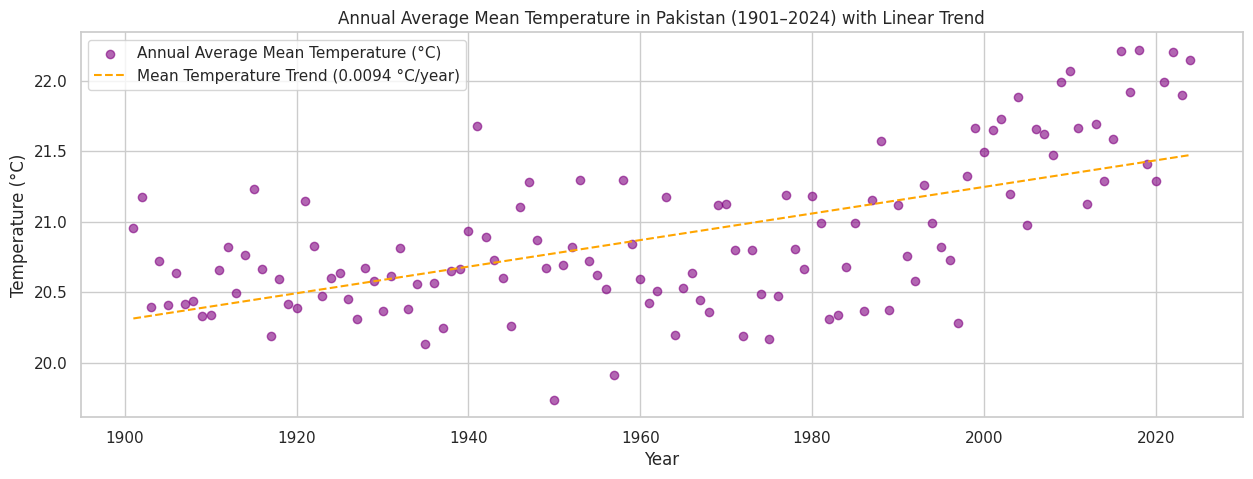

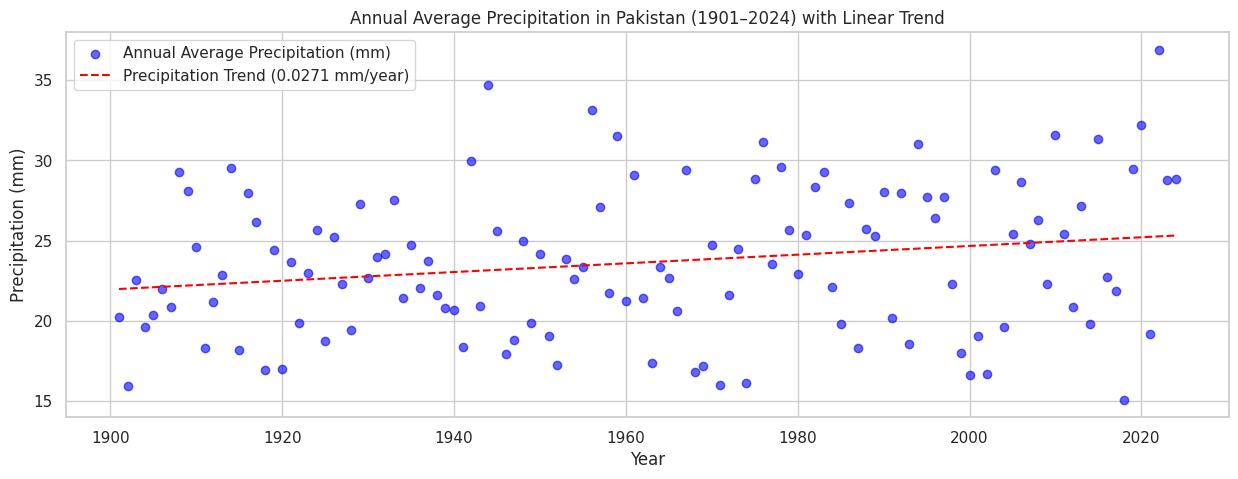

In [ ]:
import matplotlib.pyplot as plt
# Assuming annual_avg, temp_regression, and pr_regression are available from previous cells

if 'annual_avg' in locals() and 'temp_regression' in locals() and 'pr_regression' in locals():
    # Calculate trend line values
    annual_avg['tas_avg_trend'] = temp_regression.intercept + temp_regression.slope * annual_avg['year']
    annual_avg['pr_annual_avg_trend'] = pr_regression.intercept + pr_regression.slope * annual_avg['year']

    # Plot annual average mean temperature with trend
    plt.figure(figsize=(15, 5))
    plt.scatter(annual_avg["year"], annual_avg["tas_avg"], label="Annual Average Mean Temperature (°C)", color='purple', alpha=0.6) # Changed to scatter plot
    plt.plot(annual_avg["year"], annual_avg["tas_avg_trend"], label=f"Mean Temperature Trend ({temp_regression.slope:.4f} °C/year)", color='orange', linestyle='--')
    plt.title("Annual Average Mean Temperature in Pakistan (1901–2024) with Linear Trend")
    plt.xlabel("Year")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot annual average precipitation with trend
    plt.figure(figsize=(15, 5))
    plt.scatter(annual_avg["year"], annual_avg["pr_annual_avg"], label="Annual Average Precipitation (mm)", color='blue', alpha=0.6) # Changed to scatter plot
    plt.plot(annual_avg["year"], annual_avg["pr_annual_avg_trend"], label=f"Precipitation Trend ({pr_regression.slope:.4f} mm/year)", color='red', linestyle='--')
    plt.title("Annual Average Precipitation in Pakistan (1901–2024) with Linear Trend")
    plt.xlabel("Year")
    plt.ylabel("Precipitation (mm)")
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("Error: Required DataFrames or regression results not found. Please run the cells that calculate annual averages and perform linear regression first.")

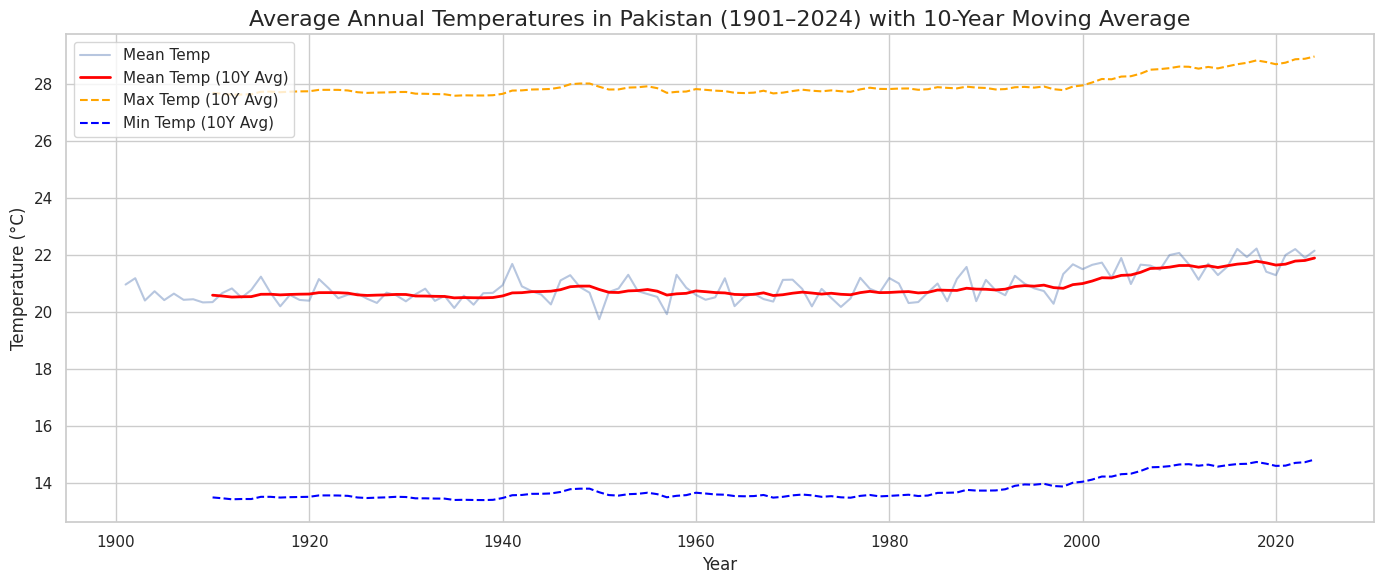

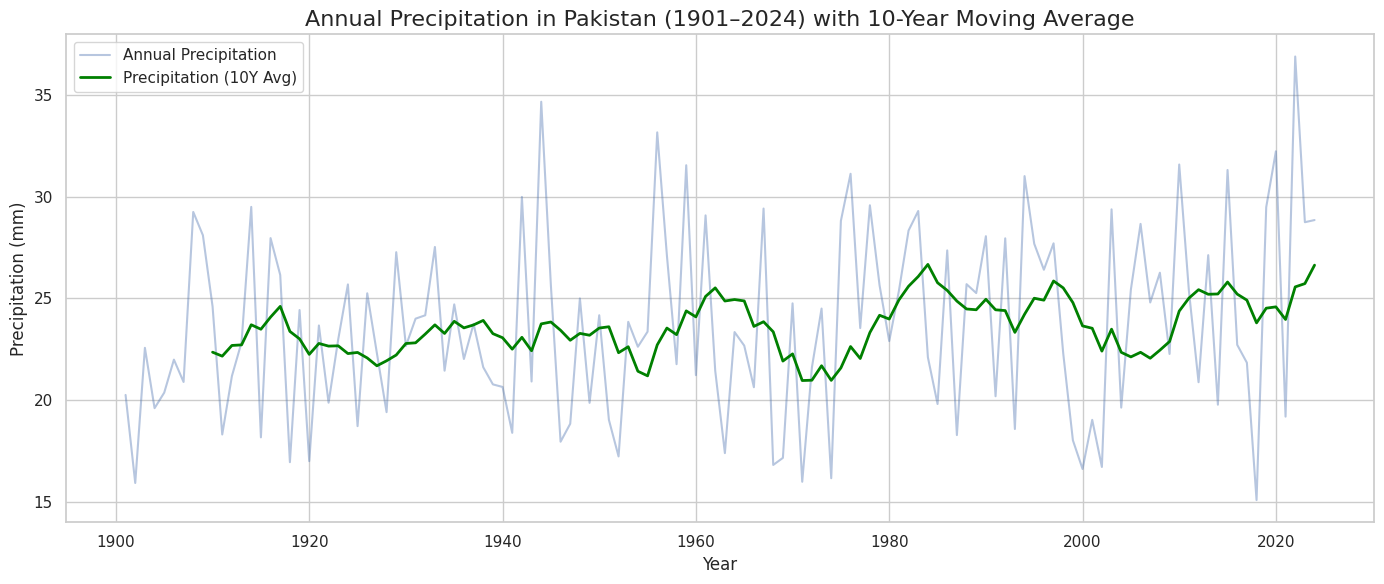

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming annual_avg DataFrame is available from previous steps

# Apply rolling average (window = 10 years)
annual_avg['tas_avg_smooth'] = annual_avg['tas_avg'].rolling(window=10).mean()
annual_avg['tasmax_smooth'] = annual_avg['tasmax_annual_avg'].rolling(window=10).mean()
annual_avg['tasmin_smooth'] = annual_avg['tasmin_annual_avg'].rolling(window=10).mean()
annual_avg['pr_smooth'] = annual_avg['pr_annual_avg'].rolling(window=10).mean()

# Set style
sns.set(style='whitegrid', rc={'figure.figsize': (14, 8)})

# --- Temperature Plot with Moving Average ---
plt.figure(figsize=(14, 6))
plt.plot(annual_avg['year'], annual_avg['tas_avg'], label='Mean Temp', alpha=0.4)
plt.plot(annual_avg['year'], annual_avg['tas_avg_smooth'], label='Mean Temp (10Y Avg)', color='red', linewidth=2)
plt.plot(annual_avg['year'], annual_avg['tasmax_smooth'], label='Max Temp (10Y Avg)', color='orange', linestyle='--')
plt.plot(annual_avg['year'], annual_avg['tasmin_smooth'], label='Min Temp (10Y Avg)', color='blue', linestyle='--')
plt.title('Average Annual Temperatures in Pakistan (1901–2024) with 10-Year Moving Average', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Precipitation Plot with Moving Average ---
plt.figure(figsize=(14, 6))
plt.plot(annual_avg['year'], annual_avg['pr_annual_avg'], label='Annual Precipitation', alpha=0.4)
plt.plot(annual_avg['year'], annual_avg['pr_smooth'], label='Precipitation (10Y Avg)', color='green', linewidth=2)
plt.title('Annual Precipitation in Pakistan (1901–2024) with 10-Year Moving Average', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.tight_layout()
plt.show()